In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [104]:
UserBeh = pd.read_csv(r'D:\jupyterfile\项目\UserBehavior.csv',names=['User_ID','Item_ID','Category_ID','Behavior_type','Timestamp'])
UserBeh.head(1)

,User_ID,Item_ID,Category_ID,Behavior_type,Timestamp
0,1,2268318,2520377,pv,1.511544e+09


In [105]:
# 解决timestamp数据过长会显示为科学计数的问题
import csv

csvFile = open(r'D:\jupyterfile\项目\UserBehavior.csv','r')
reader = csv.reader(csvFile)
 
ls = []
for item in reader:
    ls.append(item) 
csvFile.close()
# ls[1:] 是数据项， ls[0] 是columns
UserBeh = pd.DataFrame(data=ls[1:], columns=['User_ID','Item_ID','Category_ID','Behavior_type','Timestamp'])

In [106]:
UserBeh.head(1)

,User_ID,Item_ID,Category_ID,Behavior_type,Timestamp
0,1,2333346,2520771,pv,1511561733


### 数据清洗

1.处理空值

In [107]:
UserBeh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3835330 entries, 0 to 3835329
Data columns (total 5 columns):
User_ID          object
Item_ID          object
Category_ID      object
Behavior_type    object
Timestamp        object
dtypes: object(5)
memory usage: 146.3+ MB


In [108]:
UserBeh.isnull().sum() 

User_ID          0
Item_ID          0
Category_ID      0
Behavior_type    0
Timestamp        1
dtype: int64

In [109]:
UserBeh[UserBeh['Timestamp'].isnull()]

,User_ID,Item_ID,Category_ID,Behavior_type,Timestamp
3835329,255896,4252254,874415,p,None


In [110]:
# timestamp只有一个空值,相比我们有383w的数据量，因此这里可以直接将其删除
UserBeh = UserBeh.dropna(axis=0, how='any')

In [111]:
UserBeh.isnull().sum() 

User_ID          0
Item_ID          0
Category_ID      0
Behavior_type    0
Timestamp        0
dtype: int64

2.处理重复值(如果存在)

In [112]:
UserBeh = UserBeh.drop_duplicates()

In [113]:
UserBeh.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3835327 entries, 0 to 3835328
Data columns (total 5 columns):
User_ID          object
Item_ID          object
Category_ID      object
Behavior_type    object
Timestamp        object
dtypes: object(5)
memory usage: 175.6+ MB


3.一致化处理：将时间戳转换成datetime

In [114]:
import datetime           
UserBeh['datetime']=pd.to_datetime(UserBeh['Timestamp'],unit='s')+datetime.timedelta(hours=8)

In [115]:
UserBeh=UserBeh.drop(columns='Timestamp')

In [116]:
UserBeh.tail()

,User_ID,Item_ID,Category_ID,Behavior_type,datetime
3835324,255896,3844843,58498,pv,2017-12-01 14:50:00
3835325,255896,5081283,4640311,pv,2017-12-01 14:50:13
3835326,255896,2479617,2913673,pv,2017-12-01 14:50:24
3835327,255896,2668495,58498,pv,2017-12-01 14:50:31
3835328,255896,1688787,4640311,pv,2017-12-01 14:50:40


4.为了后续分析对datetime进行进一步的切分

In [117]:
UserBeh['Year'] = UserBeh['datetime'].dt.year
UserBeh['Month'] = UserBeh['datetime'].dt.month
UserBeh['Day'] = UserBeh['datetime'].dt.day

In [118]:
#根据时间划分为凌晨，上午，中午，下午，傍晚，晚上六个时间段
# 凌晨 0-6，上午6-11，中午11-13，下午13-16，傍晚16-18，晚上18-24
UserBeh['Time'] = UserBeh['datetime'].dt.hour
UserBeh['时间段']= pd.cut(UserBeh['Time'],bins =[0,6,11,13,16,18,24],labels = 
                       ['凌晨(00:00-06:00)','上午(06:00-11:00)','中午(11:00-13:00)','下午(13:00-16:00)',\
                        '傍晚(16:00-18:00)','晚上(18:00-24:00)'],right = False).astype(str)

In [119]:
#划分星期几
from datetime import datetime
UserBeh['Date'] = pd.to_datetime(UserBeh['datetime'].dt.date,format='%Y-%m-%d')

weekday=[]
for i in UserBeh['Date']:
       weekday.append(i.weekday()+1)
        
df2 = pd.DataFrame(weekday,columns=['Weekday'])

In [120]:
#横向堆叠起来
userb = pd.concat([UserBeh,df2],axis=1,join='inner')

5.删除异常值

In [121]:
userb['Year'].value_counts()

2017    3835306
2018         16
2037          1
2015          1
1970          1
Name: Year, dtype: int64

In [122]:
# 仅保留2017年数据
userb['Year']= userb['Year'][userb['Year'].isin(['2017'])]
userb = userb.dropna(axis=0, how='any')

6.以天为维度观察数据

In [123]:
userb.groupby('Date').count()

,User_ID,Item_ID,Category_ID,Behavior_type,datetime,Year,Month,Day,Time,时间段,Weekday
Date,,,,,,,,,,,
2017-07-03,2,2,2,2,2,2,2,2,2,2,2
2017-09-11,1,1,1,1,1,1,1,1,1,1,1
2017-09-16,2,2,2,2,2,2,2,2,2,2,2
2017-10-10,1,1,1,1,1,1,1,1,1,1,1
2017-10-31,1,1,1,1,1,1,1,1,1,1,1
2017-11-02,1,1,1,1,1,1,1,1,1,1,1
2017-11-03,14,14,14,14,14,14,14,14,14,14,14
2017-11-04,1,1,1,1,1,1,1,1,1,1,1
2017-11-05,1,1,1,1,1,1,1,1,1,1,1


In [124]:
# 决定只保留2017-11-25日到2017-12-03
# 对这九天进行分析
userb['Date']= userb['Date'][userb['Date'].between('2017-11-25','2017-12-03',inclusive=True)]
userb = userb.dropna(axis=0, how='any')

In [125]:
userb.head(5)

,User_ID,Item_ID,Category_ID,Behavior_type,datetime,Year,Month,Day,Time,时间段,Date,Weekday
0,1,2333346,2520771,pv,2017-11-25 06:15:33,2017.0,11,25,6,上午(06:00-11:00),2017-11-25,6
1,1,2576651,149192,pv,2017-11-25 09:21:25,2017.0,11,25,9,上午(06:00-11:00),2017-11-25,6
2,1,3830808,4181361,pv,2017-11-25 15:04:53,2017.0,11,25,15,下午(13:00-16:00),2017-11-25,6
3,1,4365585,2520377,pv,2017-11-25 15:49:06,2017.0,11,25,15,下午(13:00-16:00),2017-11-25,6
4,1,4606018,2735466,pv,2017-11-25 21:28:01,2017.0,11,25,21,晚上(18:00-24:00),2017-11-25,6


7.调整数据类型

In [126]:
userb = userb.drop(columns=['datetime','Time','Year','Month','Day'])

In [127]:
userb[['User_ID', 'Item_ID','Category_ID','Weekday']] = userb[['User_ID', 'Item_ID','Category_ID','Weekday']].astype(int)
userb.head(5)

,User_ID,Item_ID,Category_ID,Behavior_type,时间段,Date,Weekday
0,1,2333346,2520771,pv,上午(06:00-11:00),2017-11-25,6
1,1,2576651,149192,pv,上午(06:00-11:00),2017-11-25,6
2,1,3830808,4181361,pv,下午(13:00-16:00),2017-11-25,6
3,1,4365585,2520377,pv,下午(13:00-16:00),2017-11-25,6
4,1,4606018,2735466,pv,晚上(18:00-24:00),2017-11-25,6


In [128]:
userb.to_csv(r'D:\jupyterfile\项目\userb2.csv',index = False, encoding = 'gbk')

### 用户行为数据分析

* PV访问量(Page View): 每点开一次页面即为一次访问量
* UV访问数(Unique Visitor): 每个User_ID定义为独立访问访客数
* 日访问量变化趋势
* 用户在哪个时间段更加活跃
* 人均访问量变化趋势

In [132]:
pv_ttl = userb.groupby(by='Behavior_type').count()
pv_mean = round(pv_ttl.loc['pv']['User_ID']/9,2)

print('统计时间内总访问量：',pv_ttl.loc['pv']['User_ID'],';日均访问量：',pv_mean)

统计时间内总访问量： 3431902 ;日均访问量： 381322.44


In [133]:
uv = userb.drop_duplicates(['User_ID'],'first')
uv_ttl = uv.groupby('Behavior_type').count()
uv_mean = round(uv_ttl.loc['pv']['User_ID']/9,2)

print('统计时间内总独立访问量：',uv_ttl.loc['pv']['User_ID'],';日均独立访问量：',uv_mean)

统计时间内总独立访问量： 32543 ;日均独立访问量： 3615.89


In [134]:
# 以天为维度
pv_day = userb.groupby(by=['Behavior_type','Date']).count()
pv_day.loc['pv']['User_ID']

Date
2017-11-25    354563
2017-11-26    364554
2017-11-27    341435
2017-11-28    338412
2017-11-29    349892
2017-11-30    358866
2017-12-01    373857
2017-12-02    476867
2017-12-03    473456
Name: User_ID, dtype: int64

In [179]:
# PV日增长率
pv_ratio = []
for date in range(8):
    daily_i= pv_day.loc['pv']['User_ID'][date+1] - pv_day.loc['pv']['User_ID'][date]
    daily_r= round(daily_i/pv_day.loc['pv']['User_ID'][date]*100,2)
    pv_ratio.append(daily_r)
    
    print(pv_day.loc['pv'].index[date+1].strftime("%Y-%m-%d"),'相较于前一日PV增加',daily_i,'; PV增长率为：',daily_r,'%')

2017-11-26 相较于前一日PV增加 9991 ; PV增长率为： 2.82 %
2017-11-27 相较于前一日PV增加 -23119 ; PV增长率为： -6.34 %
2017-11-28 相较于前一日PV增加 -3023 ; PV增长率为： -0.89 %
2017-11-29 相较于前一日PV增加 11480 ; PV增长率为： 3.39 %
2017-11-30 相较于前一日PV增加 8974 ; PV增长率为： 2.56 %
2017-12-01 相较于前一日PV增加 14991 ; PV增长率为： 4.18 %
2017-12-02 相较于前一日PV增加 103010 ; PV增长率为： 27.55 %
2017-12-03 相较于前一日PV增加 -3411 ; PV增长率为： -0.72 %


In [136]:
# 以时间段为维度
pv_slot = userb.groupby(by=['Behavior_type','时间段']).count()
pv_slot.loc['pv']['User_ID']

时间段
上午(06:00-11:00)     560509
下午(13:00-16:00)     539592
中午(11:00-13:00)     325899
傍晚(16:00-18:00)     336345
凌晨(00:00-06:00)     256844
晚上(18:00-24:00)    1412713
Name: User_ID, dtype: int64

In [137]:
# 以weekday为维度
# 分析一个自然周：2017-11-27到2017-12-03
week = userb[userb['Date'].between('2017-11-27','2017-12-03',inclusive=True)]
pv_wd = week.groupby(by=['Behavior_type','Weekday']).count()
pv_wd.loc['pv']['User_ID']

Weekday
1    331679
2    336447
3    349209
4    358591
5    374051
6    486929
7    475879
Name: User_ID, dtype: int64

In [138]:
# uv by day
uv2 = userb.drop_duplicates(['User_ID','Date'],'first')
uv_day = uv2.groupby(['Behavior_type','Date']).count()
uv_day.loc['pv']['User_ID']

Date
2017-11-25    23391
2017-11-26    23749
2017-11-27    23226
2017-11-28    23385
2017-11-29    23811
2017-11-30    24157
2017-12-01    24306
2017-12-02    31831
2017-12-03    31804
Name: User_ID, dtype: int64

In [181]:
# UV日增长率
uv_ratio = []
for date2 in range(8):
    daily_i2= uv_day.loc['pv']['User_ID'][date2+1] - uv_day.loc['pv']['User_ID'][date2]
    daily_r2= round(daily_i2/uv_day.loc['pv']['User_ID'][date2]*100,2)
    uv_ratio.append(daily_r2)
    
    print(uv_day.loc['pv'].index[date2+1].strftime("%Y-%m-%d"),'相较于前一日UV增加',daily_i2,'; PV增长率为：',daily_r2,'%')

2017-11-26 相较于前一日UV增加 358 ; PV增长率为： 1.53 %
2017-11-27 相较于前一日UV增加 -523 ; PV增长率为： -2.2 %
2017-11-28 相较于前一日UV增加 159 ; PV增长率为： 0.68 %
2017-11-29 相较于前一日UV增加 426 ; PV增长率为： 1.82 %
2017-11-30 相较于前一日UV增加 346 ; PV增长率为： 1.45 %
2017-12-01 相较于前一日UV增加 149 ; PV增长率为： 0.62 %
2017-12-02 相较于前一日UV增加 7525 ; PV增长率为： 30.96 %
2017-12-03 相较于前一日UV增加 -27 ; PV增长率为： -0.08 %


In [140]:
# uv by slot
uv3 = userb.drop_duplicates(['User_ID','时间段'],'first')
uv_slot = uv3.groupby(['Behavior_type','时间段']).count()
uv_slot.loc['pv']['User_ID']

时间段
上午(06:00-11:00)    27835
下午(13:00-16:00)    28162
中午(11:00-13:00)    25321
傍晚(16:00-18:00)    25289
凌晨(00:00-06:00)    14851
晚上(18:00-24:00)    31802
Name: User_ID, dtype: int64

In [141]:
# 以weekday为维度 
uv4 = week.drop_duplicates(['User_ID','Weekday'],'first')
uv_wd = uv4.groupby(by=['Behavior_type','Weekday']).count()
uv_wd.loc['pv']['User_ID']

Weekday
1    22250
2    22916
3    23523
4    23988
5    24227
6    31710
7    31629
Name: User_ID, dtype: int64

In [142]:
# pv/uv by day
pu_day = pv_day.loc['pv']['User_ID']/uv_day.loc['pv']['User_ID']
pu_day

Date
2017-11-25    15.158095
2017-11-26    15.350288
2017-11-27    14.700551
2017-11-28    14.471328
2017-11-29    14.694553
2017-11-30    14.855570
2017-12-01    15.381264
2017-12-02    14.981213
2017-12-03    14.886681
Name: User_ID, dtype: float64

In [147]:
# pu/uv by slot
pu_slot = (pv_slot.loc['pv']['User_ID']/uv_slot.loc['pv']['User_ID'])/9
pu_slot

时间段
上午(06:00-11:00)    2.237427
下午(13:00-16:00)    2.128921
中午(11:00-13:00)    1.430078
傍晚(16:00-18:00)    1.477783
凌晨(00:00-06:00)    1.921636
晚上(18:00-24:00)    4.935794
Name: User_ID, dtype: float64

In [144]:
# pu/uv by weekday
pu_wd = pv_wd.loc['pv']['User_ID']/uv_wd.loc['pv']['User_ID']
pu_wd

Weekday
1    14.906921
2    14.681751
3    14.845428
4    14.948766
5    15.439427
6    15.355692
7    15.045654
Name: User_ID, dtype: float64

### 可视化

In [149]:
plt.rcParams['font.sans-serif'] = ['SimHei'] #解决中文显示乱码问题
plt.rcParams['axes.unicode_minus'] = False #解决符号显示问题

In [184]:
uv_ratio

[1.53, -2.2, 0.68, 1.82, 1.45, 0.62, 30.96, -0.08]

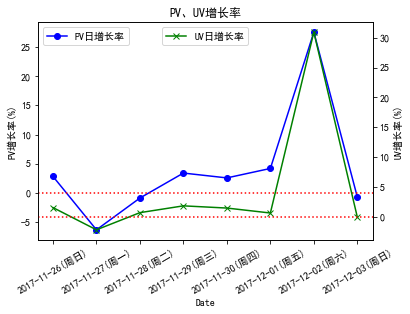

In [190]:
x = ['2017-11-26(周日)','2017-11-27(周一)','2017-11-28(周二)','2017-11-29(周三)','2017-11-30(周四)','2017-12-01(周五)','2017-12-02(周六)','2017-12-03(周日)']
fig2 = plt.figure()
a = fig2.add_subplot(111)
a.plot(x,pv_ratio,'bo-',label='PV日增长率')
a.set_xlabel('Date')
a.set_ylabel('PV增长率(%)')
plt.axhline(y=0,ls=':',c='red')
plt.xticks(rotation=30,fontsize=10)
plt.legend(loc='best')

b = a.twinx()
b.plot(x,uv_ratio,'gx-',label='UV日增长率')
b.set_ylabel('UV增长率(%)')
plt.axhline(y=0,ls=':',c='red')
plt.legend(loc='upper center')
plt.title('PV、UV增长率')
plt.show()

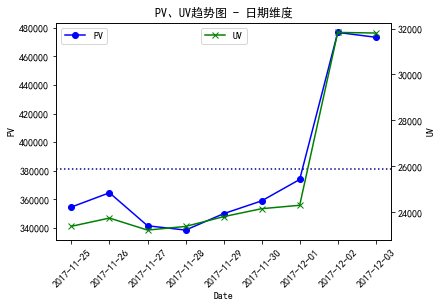

In [151]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(pv_day.loc['pv']['User_ID'].index,pv_day.loc['pv']['User_ID'],'bo-',label='PV')
ax1.set_xlabel('Date')
ax1.set_ylabel('PV')
plt.axhline(y=pv_mean,ls=':',c='darkblue')
plt.xticks(rotation=45,fontsize=10)
plt.legend(loc='best')

ax2 = ax1.twinx()
ax2.plot(uv_day.loc['pv']['User_ID'].index,uv_day.loc['pv']['User_ID'],'gx-',label='UV')
ax2.set_ylabel('UV')
plt.legend(loc='upper center')
plt.title('PV、UV趋势图 - 日期维度')
plt.show()

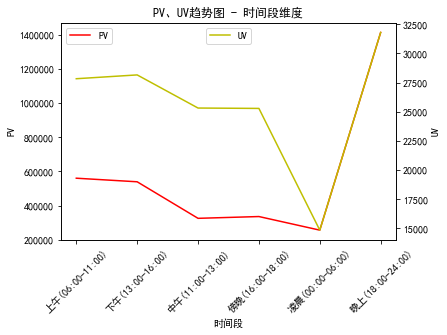

In [152]:
fig = plt.figure()
ax3 = fig.add_subplot(111)
ax3.plot(pv_slot.loc['pv']['User_ID'].index,pv_slot.loc['pv']['User_ID'],'r-',label='PV')
ax3.set_xlabel('时间段')
ax3.set_ylabel('PV')
plt.xticks(rotation=45,fontsize=10)
plt.legend(loc='best')

ax4 = ax3.twinx()
ax4.plot(uv_slot.loc['pv']['User_ID'].index,uv_slot.loc['pv']['User_ID'],'y-',label='UV')
ax4.set_ylabel('UV')
plt.legend(loc='upper center')
plt.title('PV、UV趋势图 - 时间段维度')
plt.show()

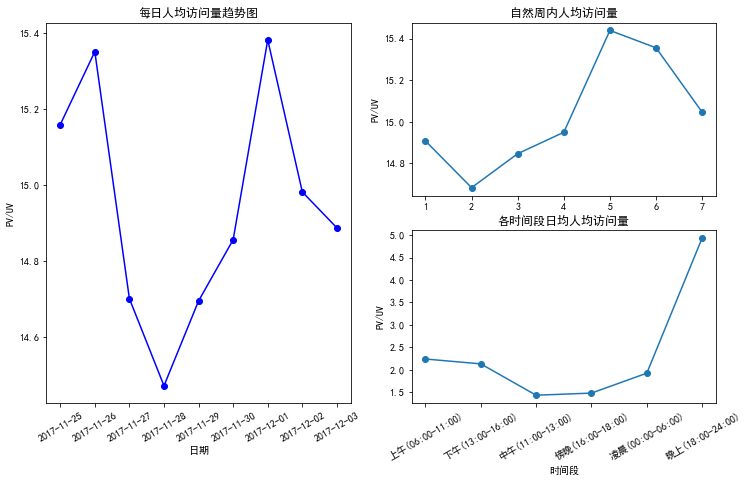

In [165]:
plt.figure(figsize=(12,7))
plt.subplot2grid((2,2),(0,0),colspan=1,rowspan=2) 
plt.plot(pu_day.index,pu_day,'bo-')
plt.xticks(rotation=30,fontsize=10)
plt.xlabel('日期')
plt.title('每日人均访问量趋势图')
plt.ylabel('PV/UV')

plt.subplot2grid((2,2),(0,1),colspan=1,rowspan=1)
plt.plot(pu_wd.index,pu_wd,'o-')
# plt.xlabel('Weekday')
plt.title('自然周内人均访问量')
plt.ylabel('PV/UV')

plt.subplot2grid((2,2),(1,1),colspan=1,rowspan=1)
plt.plot(pu_slot.index,pu_slot,'o-')
plt.xticks(rotation=30,fontsize=10)
plt.xlabel('时间段')
plt.ylabel('PV/UV')
plt.title('各时间段日均人均访问量')
plt.show()

### 用户行为路径分析
* 行为之间的转化率
* 跳失率

* pv：Page view of an item's detail page, equivalent to an item click
* buy: Purchase an item
* cart：Add an item to shopping cart
* fav：Favor an item

In [515]:
pv_ttl

,User_ID,Item_ID,Category_ID,时间段,Date,Year,Month,Day,Weekday
Behavior_type,,,,,,,,,
buy,76705,76705,76705,76705,76705,76705,76705,76705,76705
cart,213634,213634,213634,213634,213634,213634,213634,213634,213634
fav,111140,111140,111140,111140,111140,111140,111140,111140,111140
pv,3431902,3431902,3431902,3431902,3431902,3431902,3431902,3431902,3431902


In [516]:
# 用户行为转化率
pv_fav = round((pv_ttl.loc['fav']['User_ID']/pv_ttl.loc['pv']['User_ID']) *100,2)
pv_cart = round((pv_ttl.loc['cart']['User_ID']/pv_ttl.loc['pv']['User_ID']) *100,2)
fav_buy = round((pv_ttl.loc['buy']['User_ID']/pv_ttl.loc['fav']['User_ID']) *100,2)
cart_buy = round((pv_ttl.loc['buy']['User_ID']/pv_ttl.loc['cart']['User_ID']) *100,2)
buy_pv = round((pv_ttl.loc['buy']['User_ID']/pv_ttl.loc['pv']['User_ID']) *100,2)

print('由浏览页面到收藏的转化率为: ',pv_fav,'%')
# print('由收藏到到购买的转化率为: ',fav_buy,'%')
print('由加入购物车到购买的转化率为: ',cart_buy,'%')
print('由浏览页面到加入购物车的转化率为: ',pv_cart,'%')
print('最终购买转化率为: ',buy_pv,'%')

由浏览页面到收藏的转化率为:  3.24 %
由加入购物车到购买的转化率为:  35.9 %
由浏览页面到加入购物车的转化率为:  6.22 %
最终购买转化率为:  2.24 %


In [166]:
# 用户行为转化率
pv_cart = round((pv_ttl.loc['cart']['User_ID']/pv_ttl.loc['pv']['User_ID']) *100,2)
buy_pv = round((pv_ttl.loc['buy']['User_ID']/pv_ttl.loc['pv']['User_ID']) *100,2)

print('由页面浏览到加入购物车的转化率为: ',pv_cart,'%')
print('由页面浏览到最终购买的转化率为: ',buy_pv,'%')

由页面浏览到加入购物车的转化率为:  6.22 %
由页面浏览到最终购买的转化率为:  2.24 %


In [167]:
# 独立访问转化率
pv_cart_u = round((uv_ttl.loc['cart']['User_ID']/uv_ttl.loc['pv']['User_ID']) *100,2)
buy_pv_u = round((uv_ttl.loc['buy']['User_ID']/uv_ttl.loc['pv']['User_ID']) *100,2)

print('由页面浏览到加入购物车的用户转化率为: ',pv_cart_u,'%')
print('由页面浏览到最终购买的用户转化率为: ',buy_pv_u,'%')

由页面浏览到加入购物车的用户转化率为:  7.32 %
由页面浏览到最终购买的用户转化率为:  4.02 %


In [517]:
# 独立访问转化率
pv_fav_u = round((uv_ttl.loc['fav']['User_ID']/uv_ttl.loc['pv']['User_ID']) *100,2)
pv_cart_u = round((uv_ttl.loc['cart']['User_ID']/uv_ttl.loc['pv']['User_ID']) *100,2)
fav_buy_u = round((uv_ttl.loc['buy']['User_ID']/uv_ttl.loc['fav']['User_ID']) *100,2)
cart_buy_u = round((uv_ttl.loc['buy']['User_ID']/uv_ttl.loc['cart']['User_ID']) *100,2)
buy_pv_u = round((uv_ttl.loc['buy']['User_ID']/uv_ttl.loc['pv']['User_ID']) *100,2)

print('由浏览页面到收藏的转化率为: ',pv_fav_u,'%')
# print('由收藏到到购买的转化率为: ',fav_buy,'%')
print('由加入购物车到购买的转化率为: ',cart_buy_u,'%')
print('由浏览页面到加入购物车的转化率为: ',pv_cart_u,'%')
print('最终购买转化率为: ',buy_pv_u,'%')

由浏览页面到收藏的转化率为:  3.51 %
由加入购物车到购买的转化率为:  54.93 %
由浏览页面到加入购物车的转化率为:  7.32 %
最终购买转化率为:  4.02 %


In [518]:
#跳失率：访问一个页面后离开网站的次数/总访问次数
BR = round((uv_ttl.iloc[0:3].sum()[0]/uv_ttl.sum()[0])*100,2)
print('跳失率为：',BR,'%')

跳失率为： 12.93 %


#### 漏斗图可视化

In [519]:
from pyecharts.globals import CurrentConfig, OnlineHostType
CurrentConfig.ONLINE_HOST = OnlineHostType.NOTEBOOK_HOST

In [520]:
# from pyecharts import options as opts
# funnel(init_opts=ops.InitOpts(js_host="https://cdn.bootcss.com/echarts/4.4.0-rc.1/"))

In [521]:
# from pyecharts.charts.funnel import Funnel
# funnel.load_javascript()

In [522]:
from pyecharts.charts.funnel import Funnel
funnel = Funnel('用户行为转化漏斗图', title_pos='center')

In [523]:
funnel.add(name='用户行为转化漏斗图',
           attr=['浏览','加购','购买'],
           value=[100,6.22,2.24],
           is_label_show=True, 
           label_pos="inside",
           label_text_color="#fff")

In [524]:
# funnel.render_notebook()

In [525]:
#funnel(init_opts=ops.InitOpts(js_host="https://cdn.bootcss.com/echarts/4.4.0-rc.1/"))

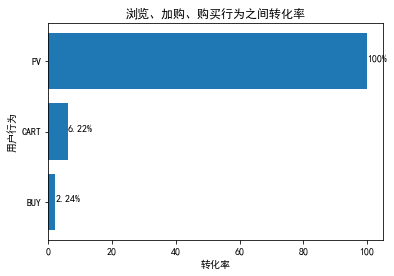

In [171]:
b2 = ['PV','CART','BUY']
r2 = [100,pv_cart,buy_pv]

plt.barh(range(3), r2)
plt.yticks(range(3), b2)
plt.gca().invert_yaxis()
plt.xlabel(u"转化率")
plt.ylabel(u'用户行为')
plt.title(u"浏览、加购、购买行为之间转化率")

for x2, y2 in enumerate(r2):
    plt.text(y2, x2, '%s' % y2 + '%')

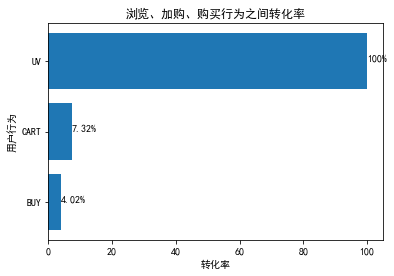

In [169]:
b = ['UV','CART','BUY']
r = [100,pv_cart_u,buy_pv_u]

plt.barh(range(3), r)
plt.yticks(range(3), b)
plt.gca().invert_yaxis()
plt.xlabel(u"转化率")
plt.ylabel(u'用户行为')
plt.title(u"浏览、加购、购买行为之间转化率")

for x, y in enumerate(r):
    plt.text(y, x, '%s' % y + '%')
    
plt.show()

In [527]:
?plt.barh

### 用户购买行为分析
* 复购率
* 最受欢迎的十个商品种类
* 购买率

In [173]:
# 有多少用户在淘宝平台上有多次购买的行为
# 重复购买行为:有购买行为超过一次的用户人数/有购买行为的总人数
buy_unit = userb[['User_ID','Date']][userb['Behavior_type']=='buy'].groupby(['User_ID']).count()
rebuy_r = round((buy_unit['Date'].value_counts().values[1:46].sum()/buy_unit['Date'].count()*100),2)

print(rebuy_r,'%的用户在统计时间内有多次购买的行为')

65.8 %的用户在统计时间内有多次购买的行为


In [174]:
# 用户对相同商品的复购率
buy_item = userb[['User_ID','Item_ID','Date']][userb['Behavior_type']=='buy'].groupby(['Item_ID','User_ID']).count()
rebuy_i = round((buy_item['Date'].value_counts().values[1:11].sum()/buy_item['Date'].count()),2)
# 用户对相同品类的复购率
buy_ctg = userb[['User_ID','Category_ID','Date']][userb['Behavior_type']=='buy'].groupby(['Category_ID','User_ID']).count()
rebuy_c = round((buy_ctg['Date'].value_counts().values[1:20].sum()/buy_ctg['Date'].count()),2)

print(rebuy_i,'%的用户在统计时间内对相同商品有复购行为')
print(rebuy_c,'%的用户在统计时间内对相同种类的商品有复购行为')

0.04 %的用户在统计时间内对相同商品有复购行为
0.11 %的用户在统计时间内对相同种类的商品有复购行为


In [172]:
# 最受欢迎的十个商品种类
num_buy = userb[['Category_ID','Date']][userb['Behavior_type']=='buy'].groupby(['Category_ID']).count()
num_buy.sort_values('Date',ascending=False).head(10)

,Date
Category_ID,
1464116,1431
2735466,1388
4145813,1297
2885642,1205
4756105,1097
4801426,1053
982926,923
2640118,698
3002561,686


In [175]:
buy = userb[['User_ID','Item_ID']][userb['Behavior_type']=='buy']
fav = userb[['User_ID','Item_ID']][userb['Behavior_type']=='fav']
cart = userb[['User_ID','Item_ID']][userb['Behavior_type']=='cart']

In [176]:
# 同时收藏又加购的商品的购买率
favcart = pd.merge(left =fav,right =cart, how ='inner', left_on=['User_ID','Item_ID'],right_on=['User_ID','Item_ID'])
buy1 = pd.merge(left =favcart,right =buy, how ='inner', left_on=['User_ID','Item_ID'],right_on=['User_ID','Item_ID']) 
ratio = round((buy1.count()[0]/favcart.count()[0]*100),2)

print('同时收藏又加购的商品的购买率:',ratio,'%')

同时收藏又加购的商品的购买率: 12.96 %


In [177]:
# 仅加购没有收藏的商品的购买率
cart2 = cart.copy()
fav2 = fav.copy()

#取补集：仅加购没有收藏的商品
cart2 = cart2.append(fav2)
cart2 = cart2.append(fav2)
cart2 = cart2.drop_duplicates(keep=False) 

buy2 = pd.merge(left =cart2,right =buy, how ='inner', left_on=['User_ID','Item_ID'],right_on=['User_ID','Item_ID'])
ratio2 = round((buy2.count()[0]/cart2.count()[0]*100),2)

print('仅加购没有收藏的商品的购买率:',ratio2,'%')

仅加购没有收藏的商品的购买率: 6.5 %


In [534]:
# 仅收藏没有加购的商品的购买率
cart3 = cart.copy()
fav3 = fav.copy()

#取补集：仅加购没有收藏的商品
fav3 = fav3.append(cart3)
fav3 = fav3.append(cart3)
fav3 = fav3.drop_duplicates(keep=False) 

buy3 = pd.merge(left =fav3,right =buy, how ='inner', left_on=['User_ID','Item_ID'],right_on=['User_ID','Item_ID'])
ratio3 = round((buy3.count()[0]/fav3.count()[0]*100),2)

print('仅收藏没有加购的商品的购买率:',ratio3,'%')

仅收藏没有加购的商品的购买率: 4.49 %
